In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import  make_scorer

## Read data

In [3]:
df = pd.read_csv('/Users/annabialas/Documents/Projects/house-prices-advanced-regression-techniques/data/train.csv')
print(f'Shape: {df.shape}')
df.info()

Shape: (1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int

In [4]:
y = df['SalePrice']
df = df.drop(['Id'], axis=1)

## Analyze the target

/Users/annabialas/opt/anaconda3/envs/cs109a/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


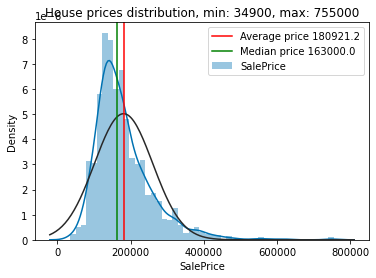

In [5]:
import scipy.stats as st

plot = sns.distplot(y, kde=True, fit=st.norm, label="SalePrice")

plot.axvline(y.mean(), color='red', label=f'Average price {y.mean().round(1)}')
plot.axvline(y.median(), color='green', label=f'Median price {y.median()}')

plot.set_title(f'House prices distribution, min: {y.min()}, max: {y.max()}')
plot.legend()
plt.show()

/Users/annabialas/opt/anaconda3/envs/cs109a/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


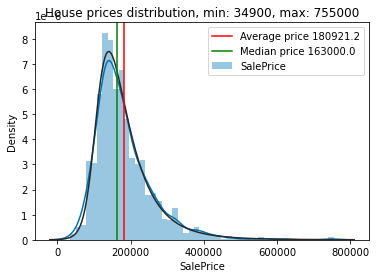

In [6]:
import scipy.stats as st

plot = sns.distplot(y, kde=True, fit=st.johnsonsu, label="SalePrice")

plot.axvline(y.mean(), color='red', label=f'Average price {y.mean().round(1)}')
plot.axvline(y.median(), color='green', label=f'Median price {y.median()}')

plot.set_title(f'House prices distribution, min: {y.min()}, max: {y.max()}')
plot.legend()
plt.show()

Unsuprising the distribution of house prices is skewed to the right, with minimum price of almost $35,000 and maximum price of $755,000. The average house price is slightly more than $180,000 and the median is $17,000 less. 

## Analyzie independent variables. 



In [7]:
# Assuming you have a DataFrame named 'df'
# Use the select_dtypes method to filter columns by data type
categorical_columns = df.select_dtypes(include='object').columns.tolist()
numerical_columns = df.drop(columns='SalePrice').select_dtypes(exclude='object').columns.tolist()

# Print or use the lists as needed
print(f"Categorical Columns ({len(categorical_columns)}):", categorical_columns)
print(f"Numerical Columns ({len(numerical_columns)}):", numerical_columns)

Categorical Columns (43): ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Numerical Columns (36): ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 

In [8]:
df.describe(include='all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


### Missing values

<AxesSubplot:>

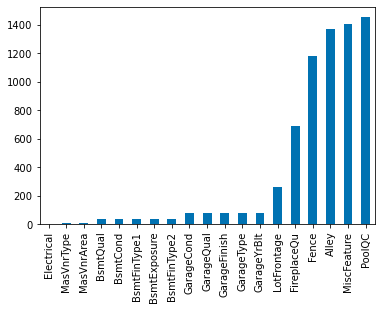

In [9]:
missing = df.isna().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [10]:
print(df.loc[df['GarageCond'].isna(), ['GarageArea']].sum())
print(df.loc[df['BsmtCond'].isna(), ['TotalBsmtSF']].sum())
print(df.loc[df['FireplaceQu'].isna(), ['Fireplaces']].sum())
print(df.loc[df['PoolQC'].isna(), ['PoolArea']].sum())

GarageArea    0
dtype: int64
TotalBsmtSF    0
dtype: int64
Fireplaces    0
dtype: int64
PoolArea    0
dtype: int64


In [11]:
df.loc[df['LotFrontage'].isna(), 'LotConfig'].value_counts()

Inside     134
Corner      62
CulDSac     49
FR2         14
Name: LotConfig, dtype: int64

In [12]:
for missing_col in missing[3:].index:
    if df.loc[df[missing_col] == 'NA', :].shape[0] >0:
        print(missing_col)

In [13]:
df.loc[df[missing.index[:3].values].isna().any(axis=1), :]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
529,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
650,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
936,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
973,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
977,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1243,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1278,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000
1379,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


There are 19 columns with missing values. 5 of them miss more than 50% of the values. 

- Garage... -> missing value indidates no garage (seems like the 'NA' category does not really exist)
- Bsmt... -> missing value indidates no basement (seems like the 'NA' category does not really exist)
- Fireplace... -> missing value indidates no fireplace (seems like the 'NA' category does not really exist)
- Pool... -> missing value indidates no pool area (seems like the 'NA' category does not really exist)

Other variables are difficult to confirm, due to lack of correcponding features, but all of the, seem to be lacking the 'NA' category, which features in the description. Therefore, we will assume that missingness is related to lack the condition in the building. 

For: 
- Electrical, as there is only one, we will be fill with the most popular value: SBrkr. 
- MasVnrType -> missing, MasVnrArea -> 0
- LotFrontage -> 0 as it seems like most of the misisng values from no frontage lot

In [14]:
for c in categorical_columns:
    df[c] = df[c].astype('category')
    if df[c].isnull().any():
        if c == 'Electrical':
            df[c] = df[c].fillna('SBrkr')
        else:
            df[c] = df[c].cat.add_categories(['MISSING'])
            df[c] = df[c].fillna('MISSING')

In [15]:
for c in numerical_columns:
    if df[c].isnull().any():
        print(c)
        if c == 'GarageYrBlt':
            df[c] = df[c].fillna(np.floor(df[c].mean()))
        else:
            df[c] = df[c].fillna(0)

LotFrontage
MasVnrArea
GarageYrBlt


In [16]:
missing = df.isna().sum()
missing = missing[missing>0]
missing

Series([], dtype: int64)

### Numerical variables

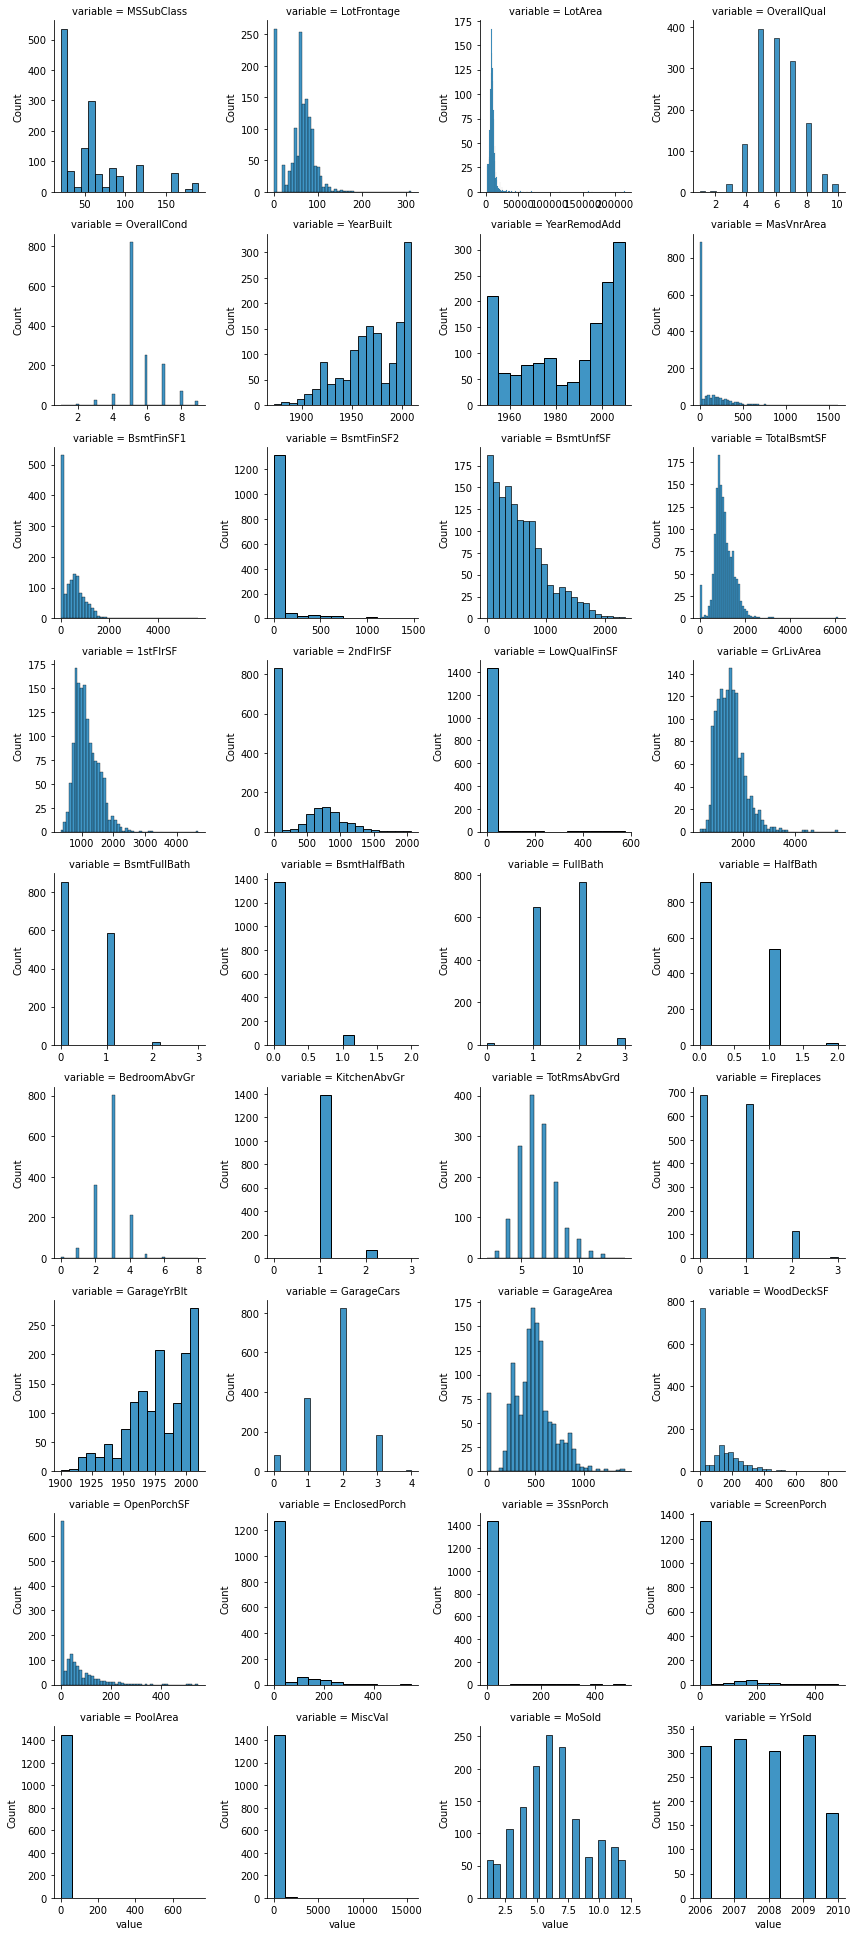

In [17]:
f = pd.melt(df, value_vars=numerical_columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.histplot, "value")


Very few of the variables are normally distributed. 

LogTransform: 'LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea',

SqrtTransform: 

Addressing irregularities:
- Boolean variable: 'MSSubClass', 'LotFrontage', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF'

### Categorical variables

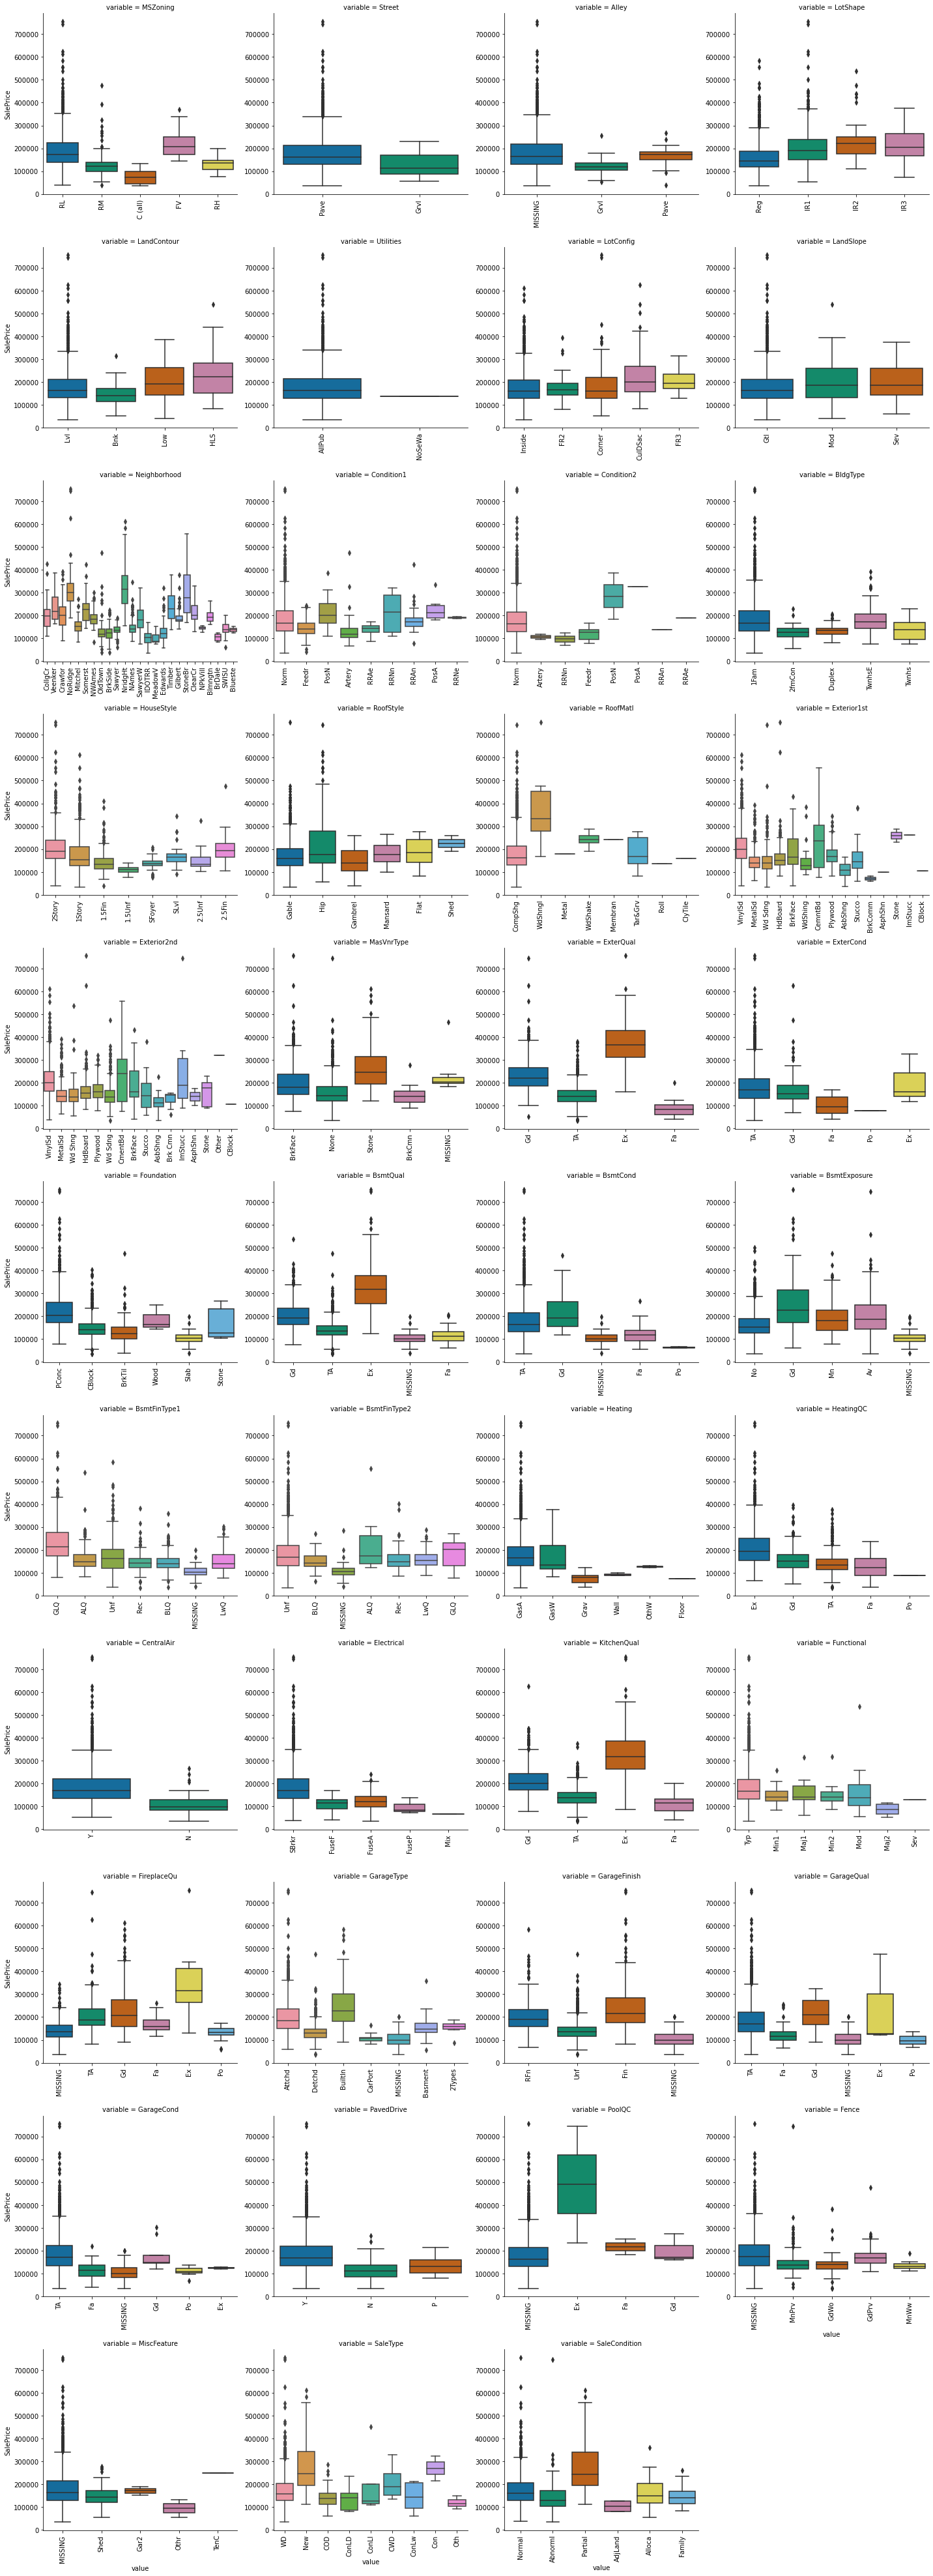

In [18]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(df, id_vars=['SalePrice'], value_vars=categorical_columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "SalePrice")

It looks like different variables have differnt impact on the price. In general it seems like an execelecn condition of any of the rooem (with execption of teh garage) correlates with high price. Neightborugood also seems to matter. Having a pool increases the value of the house.

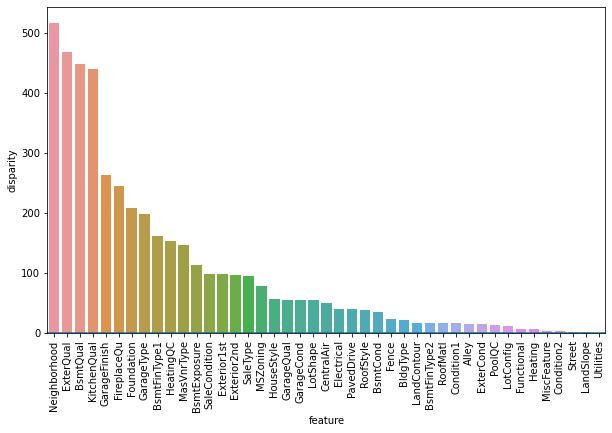

In [19]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = categorical_columns
    pvals = []
    for c in categorical_columns:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(df)
plt.figure(figsize=(10, 6))
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
plt.axhline(np.log(1./(0.5)))
x=plt.xticks(rotation=90)

# LABELS!!!!!

Anova (Analasis of Variance) is a statistical test analyze difference of means in between two or more groups. The null hyphothesis states that there is not significant difference between the means of the groups. The alternativa hypothesis states that at least one of the means is significantly different from any other. 

It can be used a sa quick estimator of the influence of a variable on the SalePrice

In [20]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
qual_encoded = []
for q in categorical_columns:  
    encode(df, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E', 'SaleCondition_E']


We encode the ordering of the categorical variables. While this method has the advantage of not exploding the number of features (in contrast to 1-hot-encoding), it has an obvious drawback of making the categoris equi-distant.  

### Correlation

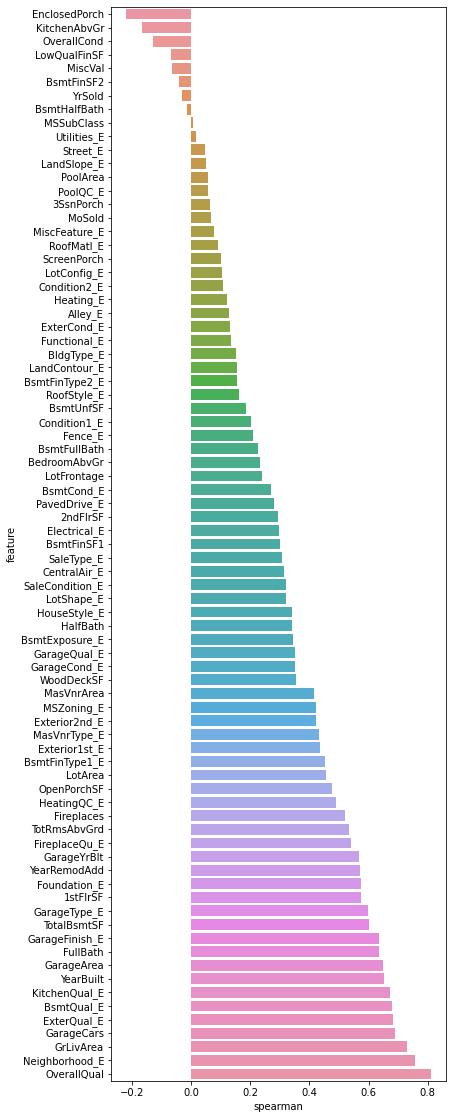

In [21]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = numerical_columns + qual_encoded
spearman(df, features)

Spearman test is a non-paramteric measure of statistical dependend between two variables. It based on the rank of each variabel rather than raw values. It asseses any monotonic relationship (mot just linear) and therefore it is more  generalizable than pearson coeficient. 

As we can see OverallQual is the main criteria in establishing a house price. Neighborhood has big influence, partially it has some intrisinc value in itself, but also houses in certain regions tend to share same characteristics (confunding) what causes similar valuations.

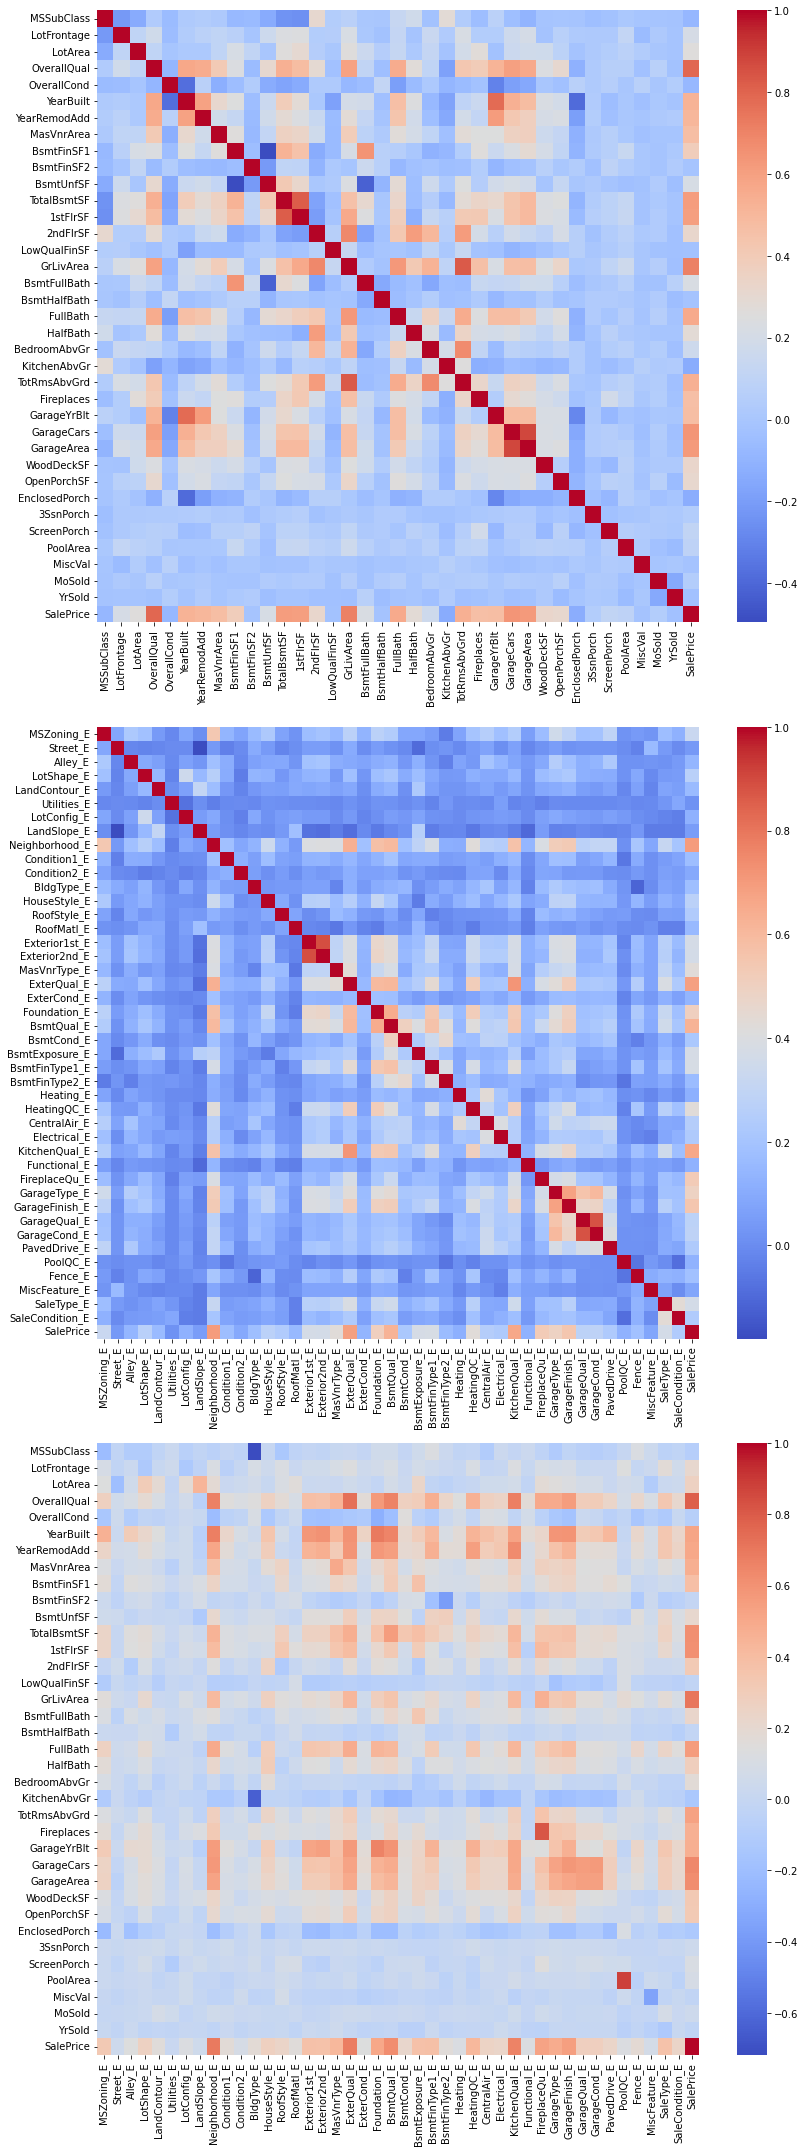

In [22]:
# cmap = sns.diverging_palette(220, 20, as_cmap=True)
cmap = 'coolwarm'
# Set a larger figure size
plt.figure(figsize=(12,30))

plt.subplot(311)
corr = df[numerical_columns+['SalePrice']].corr()
sns.heatmap(corr, cmap=cmap)

plt.subplot(312)
corr = df[qual_encoded+['SalePrice']].corr()
sns.heatmap(corr, cmap=cmap)

plt.subplot(313)
corr = pd.DataFrame(np.zeros([len(numerical_columns)+1, len(qual_encoded)+1]), index=numerical_columns+['SalePrice'], columns=qual_encoded+['SalePrice'])
for q1 in numerical_columns+['SalePrice']:
    for q2 in qual_encoded+['SalePrice']:
        corr.loc[q1, q2] = df[q1].corr(df[q2])
sns.heatmap(corr, cmap=cmap)
plt.tight_layout()

There are many strong correlations between variables. Garages seem to be built same year as houses, basements have generally same area as first floor which is pretty obvious. Garage area is strongly correlated with number of cars. Neighborhood is correlated with lots of other variables and this confirms the idea that houses in same region share same characteristics. Dwelling type is negatively correlated with kitchen above grade square feet.

/Users/annabialas/opt/anaconda3/envs/cs109a/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


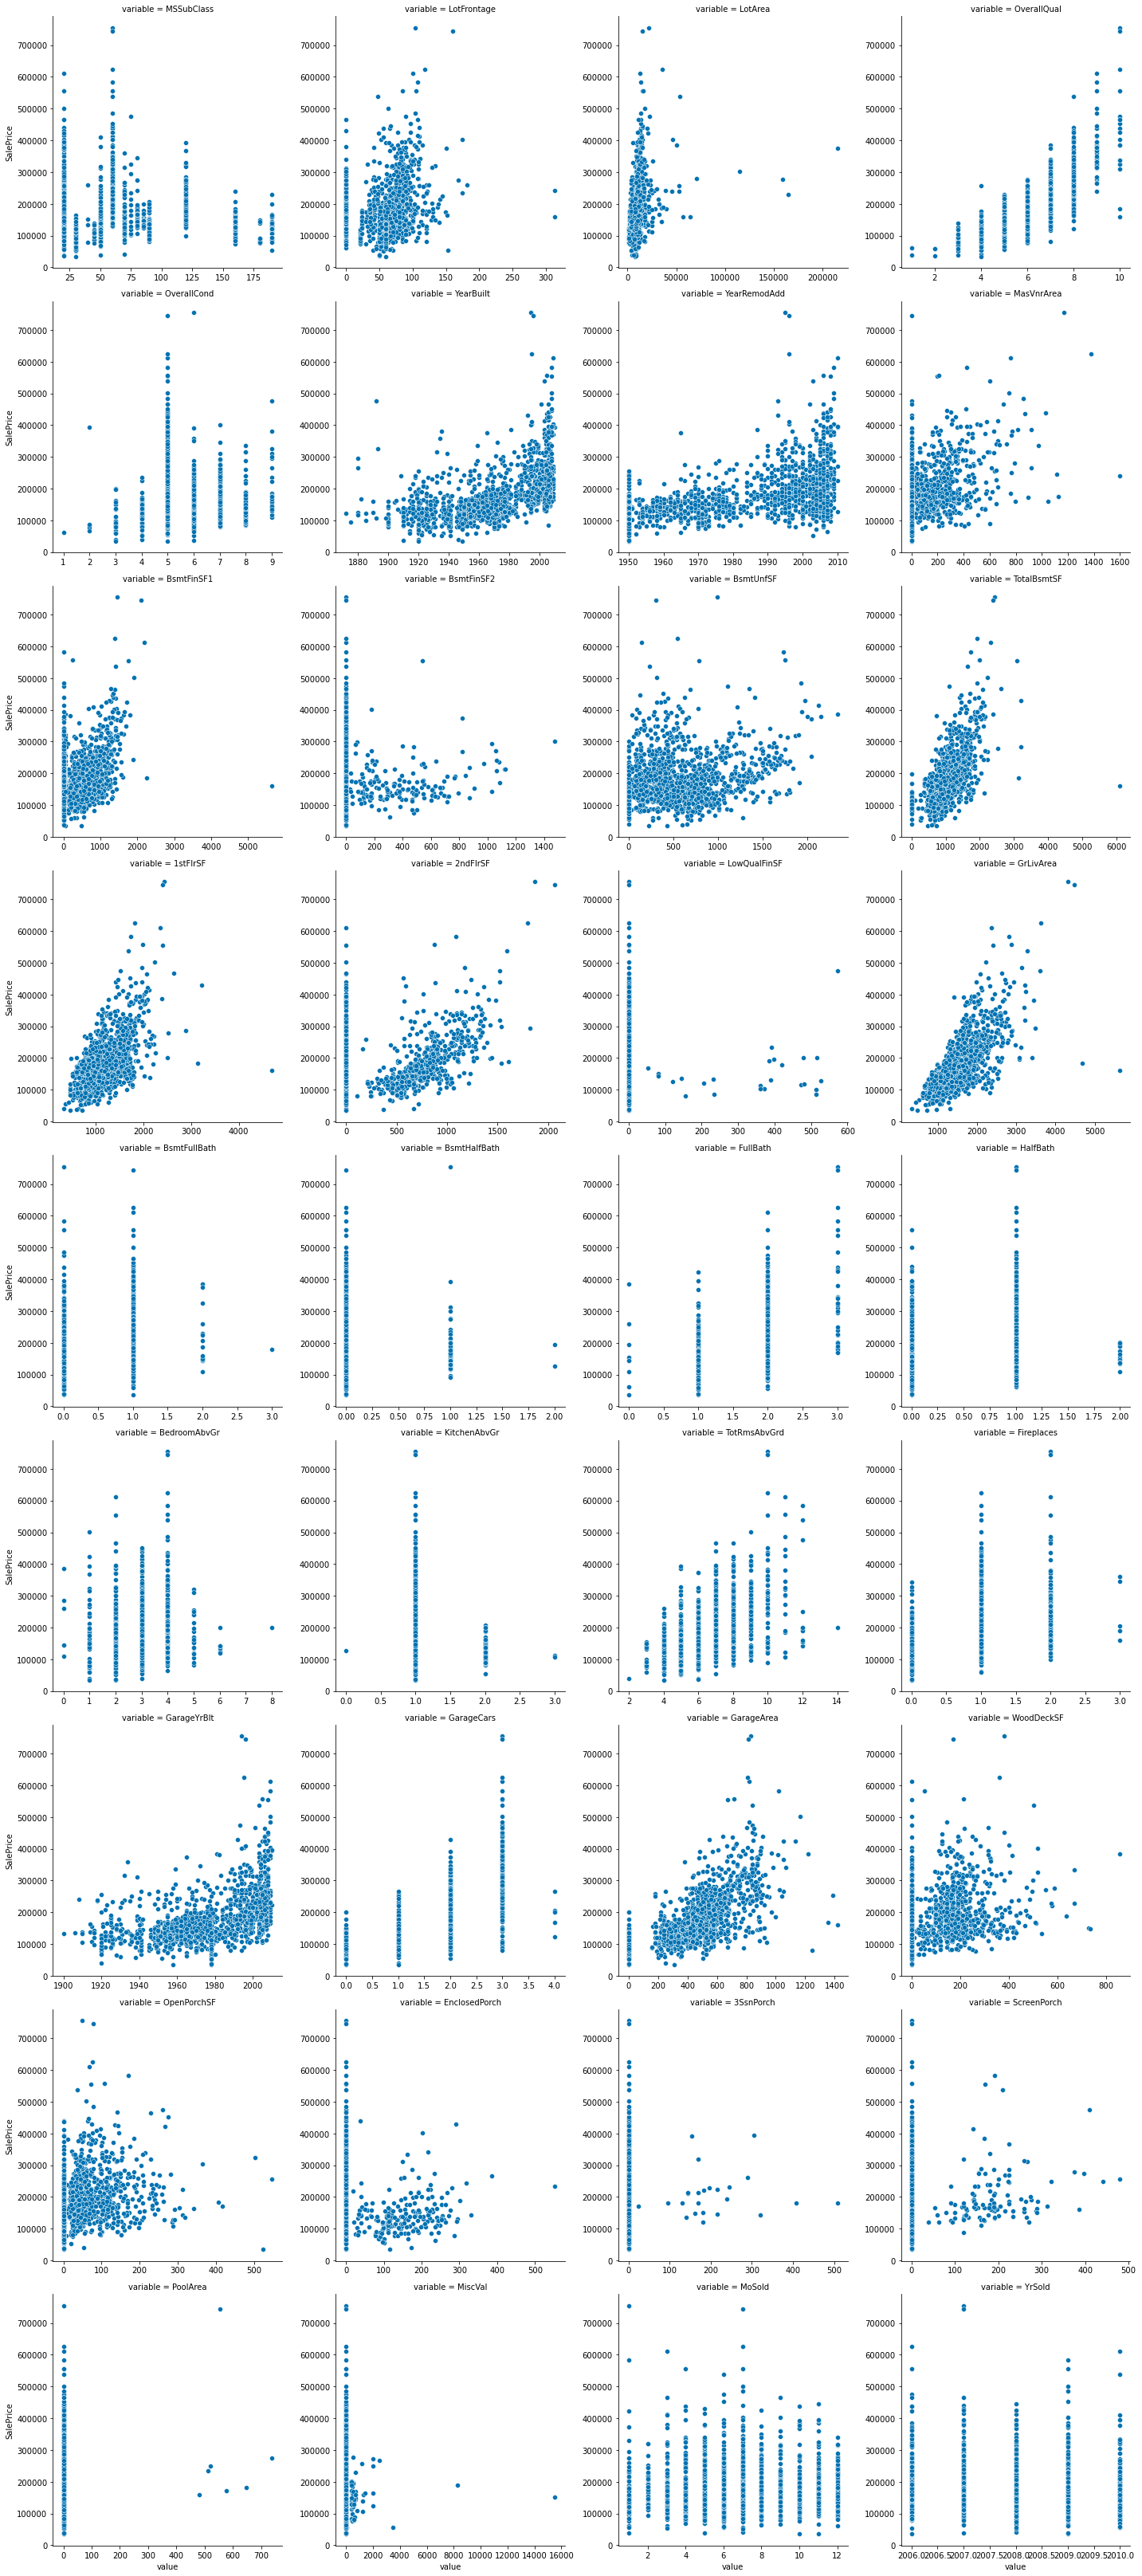

In [23]:
f = pd.melt(df, id_vars=['SalePrice'], value_vars=numerical_columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False, size=5)
g = g.map(sns.scatterplot, "value", "SalePrice")

There are lots of nonlinearities this may be the cause why some variables wont be selected by Lasso/Lars. Some factors like YearBuilt, 1stFlrSF, 2ndFlrSF, Neighborhood_E look like they would benefit from adding quadratic term to regression. But on the other hand this will most probably provoke overfit.

### Price segments

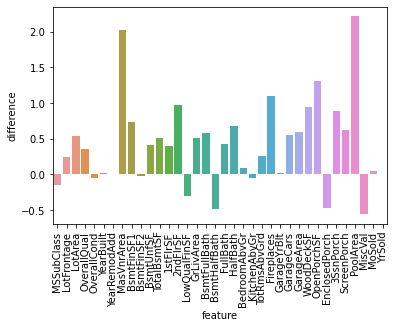

In [24]:
features = numerical_columns

standard = df[df['SalePrice'] < 200000]

pricey = df[df['SalePrice'] >= 200000]

diff = pd.DataFrame()
diff['feature'] = features
diff['difference'] = [(pricey[f].mean() - standard[f].mean())/(standard[f].fillna(0.).mean())
                      for f in features]

sns.barplot(data=diff, x='feature', y='difference')
x=plt.xticks(rotation=90)

Expensive houses have: Pools, Open Porches, Fireplaces and MasVnrArea.

### Clustering

0.7477814596092294


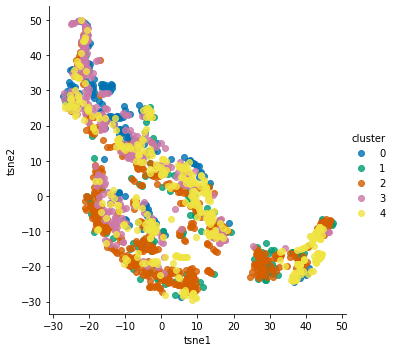

In [25]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

features = numerical_columns + qual_encoded
model = TSNE(n_components=2, random_state=0, perplexity=50)
X = df[features].values
tsne = model.fit_transform(X)

std = StandardScaler()
s = std.fit_transform(X)
pca = PCA(n_components=30)
pca.fit(s)
pc = pca.transform(s)
kmeans = KMeans(n_clusters=5)
kmeans.fit(pc)

fr = pd.DataFrame({'tsne1': tsne[:,0], 'tsne2': tsne[:, 1], 'cluster': kmeans.labels_})
sns.lmplot(data=fr, x='tsne1', y='tsne2', hue='cluster', fit_reg=False)
print(np.sum(pca.explained_variance_ratio_))

30 First PCA Components explain 75% of variance. There seems to be some clustering present but it is not enough for segmented regression.

## Reload the dataset and split into train-validation

In [26]:
# df = pd.read_csv('/Users/annabialas/Documents/Projects/house-prices-advanced-regression-techniques/data/train.csv')
# print(f'Shape: {df.shape}')
# df.info()

# df.drop(columns='Id')

from sklearn.model_selection import train_test_split

train, val = train_test_split(df, test_size=0.2, random_state=42)
print(train.shape, val.shape)

train_X, train_y = train.drop(columns='SalePrice'), train['SalePrice'].values 
val_X, val_y = val.drop(columns='SalePrice'), val['SalePrice'].values 

(1168, 123) (292, 123)


## Regression

In [27]:
import sklearn.linear_model as linear_model
from sklearn.preprocessing import StandardScaler

def error(actual, predicted):
    actual = np.log(actual)
    predicted = np.log(predicted)
    return np.sqrt(np.sum(np.square(actual-predicted))/len(actual))

def log_transform(feature, df):
    df[feature] = np.log1p(df[feature].values)

def quadratic(feature, df):
    df[feature+'2'] = df[feature]**2

for df in [train_X, val_X]:
    log_transform('GrLivArea', df)
    log_transform('1stFlrSF', df)
    log_transform('2ndFlrSF', df)
    log_transform('TotalBsmtSF', df)
    log_transform('LotArea', df)
    log_transform('LotFrontage', df)
    log_transform('KitchenAbvGr', df)
    log_transform('GarageArea', df)

    quadratic('OverallQual', df)
    quadratic('YearBuilt', df)
    quadratic('YearRemodAdd', df)
    quadratic('TotalBsmtSF', df)
    quadratic('2ndFlrSF', df)
    quadratic('Neighborhood_E', df)
    quadratic('RoofMatl_E', df)
    quadratic('GrLivArea', df)

qdr = ['OverallQual2', 'YearBuilt2', 'YearRemodAdd2', 'TotalBsmtSF2',
        '2ndFlrSF2', 'Neighborhood_E2', 'RoofMatl_E2', 'GrLivArea2']

for df in [train_X, val_X]:
    df['HasBasement'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
    df['HasGarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    df['Has2ndFloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
    df['HasMasVnr'] = df['MasVnrArea'].apply(lambda x: 1 if x > 0 else 0)
    df['HasWoodDeck'] = df['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)
    df['HasPorch'] = df['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)
    df['HasPool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    df['IsNew'] = df['YearBuilt'].apply(lambda x: 1 if x > 2000 else 0)

boolean = ['HasBasement', 'HasGarage', 'Has2ndFloor', 'HasMasVnr', 'HasWoodDeck',
            'HasPorch', 'HasPool', 'IsNew']


features = numerical_columns + qual_encoded 
# + boolean + qdr 
# In fit, once the best parameter alpha is found through cross-validation, the model is fit again using the entire training set.
lasso = linear_model.LassoLarsCV(max_iter=10000)

# define standard scaler
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(train_X[features])
X_scaled_val = scaler.transform(val_X[features])

lasso.fit(X_scaled_train, np.log(train_y))

alpha_idx = np.where(lasso.cv_alphas_ == lasso.alpha_)[0][0]
print('Aplha: ', lasso.alpha_)

Ypred_train = np.exp(lasso.predict(X_scaled_train))
Ypred_val = np.exp(lasso.predict(X_scaled_val))
print('Train error:', error(train_y, Ypred_train))
print('Mean left-out error: ', np.sqrt(lasso.mse_path_[alpha_idx, :]).mean())
print('Validation error:', error(val_y, Ypred_val))

Aplha:  0.0001957528679521596
Train error: 0.12283530579462894
Mean left-out error:  0.1315436090711416
Validation error: 0.13152345773188232


In [28]:
from operator import itemgetter
zero_features = []
non_zero_features = {}
for i, feature in enumerate(features): 
    if lasso.coef_[i] == 0:
       zero_features.append(feature)
    else: 
        non_zero_features[feature] = np.round(lasso.coef_[i], 2)

print(len(zero_features), zero_features)

dict(sorted(non_zero_features.items(), key=itemgetter(1), reverse=True))

38 ['LotFrontage', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtHalfBath', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Street_E', 'Alley_E', 'LotShape_E', 'LandSlope_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'Exterior2nd_E', 'MasVnrType_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Electrical_E', 'GarageType_E', 'GarageCond_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E']


{'GrLivArea': 0.12,
 'OverallQual': 0.07,
 'Neighborhood_E': 0.06,
 'OverallCond': 0.04,
 '1stFlrSF': 0.03,
 'GarageCars': 0.03,
 'LotArea': 0.02,
 'YearBuilt': 0.02,
 'BsmtFullBath': 0.02,
 'BsmtQual_E': 0.02,
 'KitchenQual_E': 0.02,
 'Functional_E': 0.02,
 'YearRemodAdd': 0.01,
 'BsmtFinSF1': 0.01,
 'Fireplaces': 0.01,
 'WoodDeckSF': 0.01,
 'ScreenPorch': 0.01,
 'MSZoning_E': 0.01,
 'LandContour_E': 0.01,
 'Condition1_E': 0.01,
 'Foundation_E': 0.01,
 'BsmtExposure_E': 0.01,
 'HeatingQC_E': 0.01,
 'CentralAir_E': 0.01,
 'FireplaceQu_E': 0.01,
 'GarageQual_E': 0.01,
 'SaleCondition_E': 0.01,
 'MSSubClass': -0.0,
 'HalfBath': 0.0,
 'Utilities_E': 0.0,
 'LotConfig_E': 0.0,
 'RoofMatl_E': 0.0,
 'Exterior1st_E': 0.0,
 'ExterQual_E': 0.0,
 'ExterCond_E': 0.0,
 'BsmtCond_E': 0.0,
 'Heating_E': 0.0,
 'GarageFinish_E': 0.0,
 'PavedDrive_E': 0.0,
 'SaleType_E': 0.0,
 'KitchenAbvGr': -0.01}

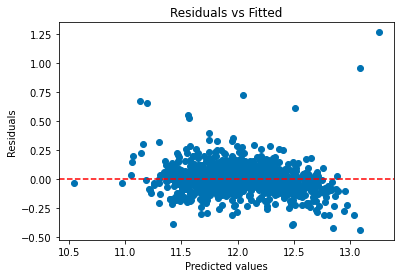

/Users/annabialas/opt/anaconda3/envs/cs109a/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


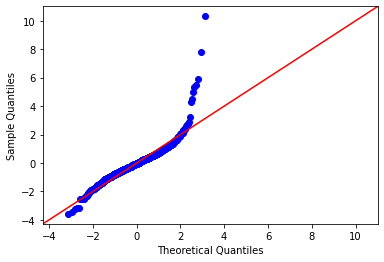

         feature        VIF
15     GrLivArea  32.997913
13      2ndFlrSF  20.779578
12      1stFlrSF  20.621382
26    GarageArea  12.309056
5      YearBuilt   8.969448
..           ...        ...
46  Condition2_E   1.139364
35        YrSold   1.138771
41   Utilities_E   1.106658
34        MoSold   1.098532
30     3SsnPorch   1.054286

[79 rows x 2 columns]
                         feature       VIF
YearBuilt              YearBuilt  5.588048
GrLivArea              GrLivArea  4.079486
OverallQual          OverallQual  4.046287
FireplaceQu_E      FireplaceQu_E  3.491434
Fireplaces            Fireplaces  3.426270
BsmtQual_E            BsmtQual_E  3.404714
1stFlrSF                1stFlrSF  3.208505
Neighborhood_E    Neighborhood_E  3.153777
ExterQual_E          ExterQual_E  3.013272
KitchenQual_E      KitchenQual_E  2.792239
YearRemodAdd        YearRemodAdd  2.790788
Foundation_E        Foundation_E  2.764272
GarageCars            GarageCars  2.689889
LotArea                  LotArea  2.317

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Assuming you have a pandas DataFrame `df` with your data and a fitted Lasso model `lasso`

# Check for linearity and homoscedasticity
predicted = lasso.predict(X_scaled_train)
residuals = predicted - np.log(train_y)

plt.scatter(predicted, residuals)
plt.title('Residuals vs Fitted')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

# Check for normality of errors
sm.qqplot(residuals, line='45', fit=True)
plt.show()

# Check for multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = features
vif_data["VIF"] = [variance_inflation_factor(X_scaled_train, i) for i in range(len(features))]

print(vif_data.sort_values('VIF', ascending=False))

# Check for multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = non_zero_features
vif_data["VIF"] = [variance_inflation_factor(X_scaled_train[:, np.where(lasso.coef_ != 0)[0]], i) for i in range(len(non_zero_features))]

print(vif_data.sort_values('VIF', ascending=False))


Interprettaion of the QQplot:

- **Left of the Plot (Lower Quantiles)**: The points follow the reference line closely, suggesting that the lower end of the residual distribution is approximately normal.

- **Middle of the Plot**: The points begin to deviate from the line slightly, indicating that the central part of the distribution is not perfectly normal, but this may not necessarily be a problem depending on the degree of deviation.

- **Right of the Plot (Upper Quantiles)**: The points curve upwards away from the reference line. This indicates that the residuals have heavier tails than the normal distribution. In other words, there are more extreme values (outliers) than you would expect in a normal distribution.

### Interpretation of the Linear Regression Model Based on the Q-Q Plot:

- **Normality Violation**: The Q-Q plot suggests that the assumption of normality for the residuals is violated, particularly at the upper end of the distribution. This could affect the reliability of statistical tests that depend on normally distributed errors, such as hypothesis tests for regression coefficients or the calculation of confidence intervals.

- **Potential Outliers**: The upward curvature at the higher end of the quantiles indicates the presence of outliers or extreme values in the response variable that were not well captured by the model.

- **Model Fit**: The deviation from normality implies that the linear regression model may not be the best fit for the data. There might be non-linear relationships that are not being captured by the current model, or the presence of influential outliers could be distorting the regression results.

- **Transformations or Different Models**: To improve the model, one might consider transformations of the response variable (e.g., log transformation if the data is right-skewed), adding polynomial or interaction terms to capture non-linear effects, or using robust regression techniques that are less sensitive to outliers.

In summary, while the Q-Q plot indicates some issues with the normality of residuals, particularly in the tails, the key is to determine whether these deviations are significant enough to impact the decisions made based on the model. If the model's predictive power is strong and the deviations are small, it may still be useful for certain types of predictions or insights. However, if accuracy is paramount and the assumptions are strongly violated, alternative modeling approaches should be considered.

In [30]:
import symbulate as sm

params = np.append(lasso.intercept_,lasso.coef_)

newX = pd.DataFrame({"Constant":np.ones(len(X_scaled_train))}).join(pd.DataFrame(X_scaled_train))
MSE = (sum((np.log(train_y)-predicted)**2))/(len(newX)-len(newX.columns))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(newX.shape[0]-newX.shape[1]))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

r2 = lasso.score(X_scaled_train, np.log(train_y))
fstat = (r2/(1-r2))*((newX.shape[0]-newX.shape[1])/newX.shape[1]) #you should find N and K yourself

dfN = newX.shape[0]-newX.shape[1] #degrees of freedom in the numerator of F-statistic
dfD = newX.shape[1] #degrees of freedom in the denominator of F-statistic

pVal = 1-sm.F(dfN,dfD).cdf(fstat)
print('F-statistics:', pVal )

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
print(myDF3)

F-statistics: 1.1102230246251565e-16
    Coefficients  Standard Errors  t values  Probabilities
0        12.0307            0.004  3230.579          0.000
1        -0.0046            0.009    -0.541          0.588
2         0.0000            0.004     0.000          1.000
3         0.0237            0.006     3.764          0.000
4         0.0720            0.008     9.156          0.000
..           ...              ...       ...            ...
75        0.0000            0.009     0.000          1.000
76        0.0000            0.004     0.000          1.000
77        0.0000            0.004     0.000          1.000
78        0.0018            0.005     0.381          0.703
79        0.0130            0.004     2.933          0.003

[80 rows x 4 columns]


In [29]:
from sklearn.linear_model import RidgeCV

# The values are already logarithms
def error_log(actual, predicted):
    return np.sqrt(np.sum(np.square(actual-predicted))/len(actual))

logrsme_scorer = make_scorer(error_log)

features = list(set(numerical_columns + qual_encoded) - set(zero_features)) 
print(f'Running Lasso with {len(features)} features.')
# + boolean + qdr 
# In fit, once the best parameter alpha is found through cross-validation, the model is fit again using the entire training set.
ridge = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1], cv=5, scoring=logrsme_scorer)

# define standard scaler
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(train_X[features])
X_scaled_val = scaler.transform(val_X[features])

ridge.fit(X_scaled_train, np.log(train_y))

alpha = ridge.alpha_
print('Aplha: ', alpha)

Ypred_train = np.exp(ridge.predict(X_scaled_train))
Ypred_val = np.exp(ridge.predict(X_scaled_val))
print('Train error:', error(train_y, Ypred_train))
print('Mean left-out error: ', ridge.best_score_)
print('Validation error:', error(val_y, Ypred_val))

results = []
results.append(['RidgeCV', error(train_y, Ypred_train), ridge.best_score_, error(val_y, Ypred_val)])

Running Lasso with 41 features.
Aplha:  0.001
Train error: 0.12024378390449042
Mean left-out error:  0.12919574132195372
Validation error: 0.1285890173095718


### Model using trees

In [30]:
from sklearn.ensemble import RandomForestRegressor

# features = numerical_columns + qual_encoded + boolean
# features = boolean + numerical_columns
X_train_rf = train_X[features]
X_val_rf = val_X[features]

max_depths = range(10, 50, 5)
n_estimators_list = [100, 200, 250, 300, 500]
max_features_list = [0.5, 0.3, 'sqrt']

oobs = []
oobs_cust = []
train_errors = []
models = []
for max_features in max_features_list:
    for n_estimators in n_estimators_list:
        for max_depth in max_depths:
            rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features, oob_score=True)
            rf.fit(X_train_rf, np.log(train_y))
            models.append(rf)
            oobs.append(1-rf.oob_score_)
            custom_oob = error(train_y, np.exp(rf.oob_prediction_))
            oobs_cust.append(custom_oob)
            y_train_pred = np.exp(rf.predict(X_train_rf))
            train_errors.append(error(train_y, y_train_pred))


In [31]:
idx = np.where(oobs_cust == min(oobs_cust))[0][0]
print('Best index according to custom oobs: ', idx, 'error: ', min(oobs_cust))
models[idx]

Best index according to custom oobs:  68 error:  0.12939307554184998


RandomForestRegressor(max_depth=30, max_features=0.3, n_estimators=300,
                      oob_score=True)

In [32]:
idx = np.where(oobs == min(oobs))[0][0]
print('Best index according to 00B score: ', 'error: ', min(oobs))
print()
models[idx]

Best index according to 00B score:  error:  0.10982738154275307



RandomForestRegressor(max_depth=30, max_features=0.3, n_estimators=300,
                      oob_score=True)

In [33]:
best_rf = models[idx]
y_val_pred = best_rf.predict(X_val_rf)
error(val_y, np.exp(y_val_pred))

0.13785041681083876

In [34]:
pd.DataFrame({'features':features, 'importance': best_rf.feature_importances_}).sort_values(by='importance', ascending=False)

,features,importance
17,OverallQual,0.214747
8,GrLivArea,0.152882
3,Neighborhood_E,0.134616
25,ExterQual_E,0.061675
35,1stFlrSF,0.054032
6,YearBuilt,0.052386
24,GarageCars,0.044771
26,KitchenQual_E,0.030777
7,LotArea,0.028980
32,BsmtFinSF1,0.027302


## XBoost

In [35]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import GradientBoostingRegressor

/Users/annabialas/Library/Python/3.8/lib/python/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [36]:
from sklearn.model_selection import GridSearchCV


features = numerical_columns + qual_encoded + boolean
# features = boolean + numerical_columns
X_train_gbx = train_X[features]
X_val_gbx = val_X[features]

# The values are already logarithms
def error_log(actual, predicted):
    return np.sqrt(np.sum(np.square(actual-predicted))/len(actual))

logrsme_scorer = make_scorer(error_log)

param_grid={
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.3, 0.5, 1],
    'max_depth': [2,3,5, 7]
}

grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid=param_grid, scoring=logrsme_scorer, cv=5)
grid_search.fit(X_train_gbx, np.log(train_y))

# Get the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

KeyboardInterrupt: 

In [ ]:
gxBoost = GradientBoostingRegressor(**grid_search.best_params_)
gxBoost.fit(X_train_rf, np.log(train_y))

Ypred_val = gxBoost.predict(X_val_rf)
error(val_y, np.exp(Ypred_val))

0.1457398244181047

In [ ]:
pd.DataFrame({'features':features, 'importance': gxBoost.feature_importances_}).sort_values(by='importance', ascending=False)

,features,importance
3,OverallQual,0.302499
15,GrLivArea,0.220375
44,Neighborhood_E,0.161413
11,TotalBsmtSF,0.061194
25,GarageCars,0.049160
...,...,...
33,MiscVal,0.000000
19,HalfBath,0.000000
18,FullBath,0.000000
17,BsmtHalfBath,0.000000
